In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("Housing_price_data_set.csv")
df['num_airco']=df.airco.map({'yes':1,'no':0})
df['num_fullbase']=df.fullbase.map({'yes':1,'no':0})
df['num_gashw']=df.gashw.map({'yes':1,'no':0})
df['num_driveway']=df.driveway.map({'yes':1,'no':0})
df['num_recroom']=df.recroom.map({'yes':1,'no':0})
df['num_prefarea']=df.prefarea.map({'yes':1,'no':0})
X=df[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=df[['price']].values
# Normalization done here over X and Y
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)
m=df['lotsize'].count()
print("No. of rows : ",m)

No. of rows :  546


In [8]:
from sklearn.model_selection import train_test_split
# Intializing theta(parameters) with zero
theta = np.matrix(np.zeros(12))

ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=50,test_size=.3)

parameters after gradient descent= [[-0.31201252  0.22385437  0.0904532   0.09079023  0.09100656  0.09045408
   0.09063603  0.0905283   0.09048319  0.09083362  0.0908532   0.09065369]]

parameters after gradient descent= [[-0.3119227   0.22379977  0.09041708  0.09075363  0.09096338  0.09042555
   0.0906061   0.09049911  0.09045618  0.09079973  0.09081938  0.0906234 ]]


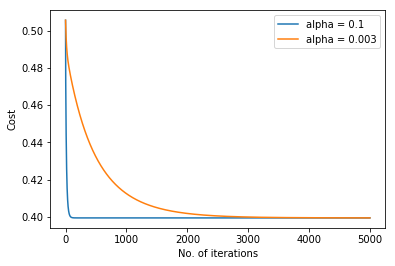

Total squared error is 0.357868382700491

Total squared error is 0.3578898032959659


In [9]:
#Gradient Descent based on the 70% of Data

#setting gradient parameters
alpha = [0.1,0.003]
iters = 5000
lemda = 100
def gradient_descent(X,Y,theta,iters,alpha):
    cost=[]
    m = len(X)
    for i in range(0,iters):
        hypothesis=X*theta.T
        error=hypothesis-Y
        ie = np.sum(np.power(error,2))
        cost.append(ie/(2*m))
        gradient=(error.T*X)/m
        theta=theta-(alpha*(gradient+lemda/m*theta))
    return theta,cost

cost_list = []
para_list = []
for a in alpha:
    para,cost=gradient_descent(x_train,y_train,theta,iters,a)
    cost_list.append(cost)
    para_list.append(para)

print("parameters after gradient descent=",para_list[0])
print()
print("parameters after gradient descent=",para_list[1])

it=np.arange(0,iters)
plt.plot(it,np.array(cost_list[0]),label="alpha = 0.1")
plt.plot(it,np.array(cost_list[1]),label="alpha = 0.003")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

##calculating sum of squared error of the test data
predicted_y=np.matmul(x_test,para_list[0].transpose())
diff=predicted_y - y_test
print("Total squared error is", end = " ")
ie = np.power(diff,2)
tse=(np.mean(ie))
print(tse/2)
print()
predicted_y=np.matmul(x_test,para_list[1].transpose())
diff=predicted_y - y_test
print("Total squared error is", end = " ")
ie = np.power(diff,2)
tse=(np.mean(ie))
print(tse/2)

parameters after gradient descent= [[-0.37511052  0.26244665  0.10882016  0.10919075  0.10945691  0.10876014
   0.10895348  0.10892115  0.10878663  0.10924533  0.10932175  0.10902757]]


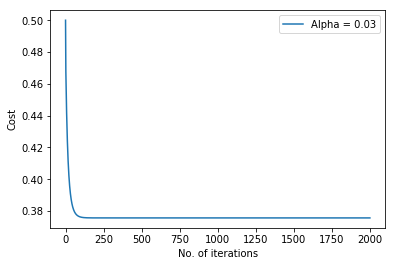

Total squared error is 0.3757259053169172


In [10]:
#gradient descent based on entire data set
lemda = 100
def gradient_descent(X,Y,theta,iters,alpha):
    cost=[]
    m = len(X)
    xTrans=X.transpose()
    for i in range(0,iters):
        hypothesis=X*theta.T
        error=hypothesis-Y
        ie = np.sum(np.power(error,2))
        cost.append(ie/(2*m))
        gradient=(error.T*X)/ m
        theta=theta-(alpha*(gradient+(lemda/m)*theta))
    return theta,cost

para,cost=gradient_descent(X,Y,theta,iters-3000,alpha[0])

print("parameters after gradient descent=",para)

it=np.arange(0,iters-3000)
plt.plot(it,np.array(cost),label = "Alpha = 0.03")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

#calculating sum of squared error for complete data set
Predicted_y=np.matmul(X,para.transpose())
diff=Predicted_y-Y
print("Total squared error is",end = " ")
tse=(np.mean(np.power(diff,2)))/2
print(tse)